In [1]:
%%capture
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

In [2]:
import os
os.chdir('/content/drive/MyDrive/Developer/AI Trade Lab/TS Classifier/src')
os.listdir()

['configs', 'data', 'models', 'train', 'utils', 'evaluate']

set seed to 42

--------------------------------------------------

Training fold 3
{'in_freq': 240, 'pct_thresh': 0.01, 'lookahead': 2}


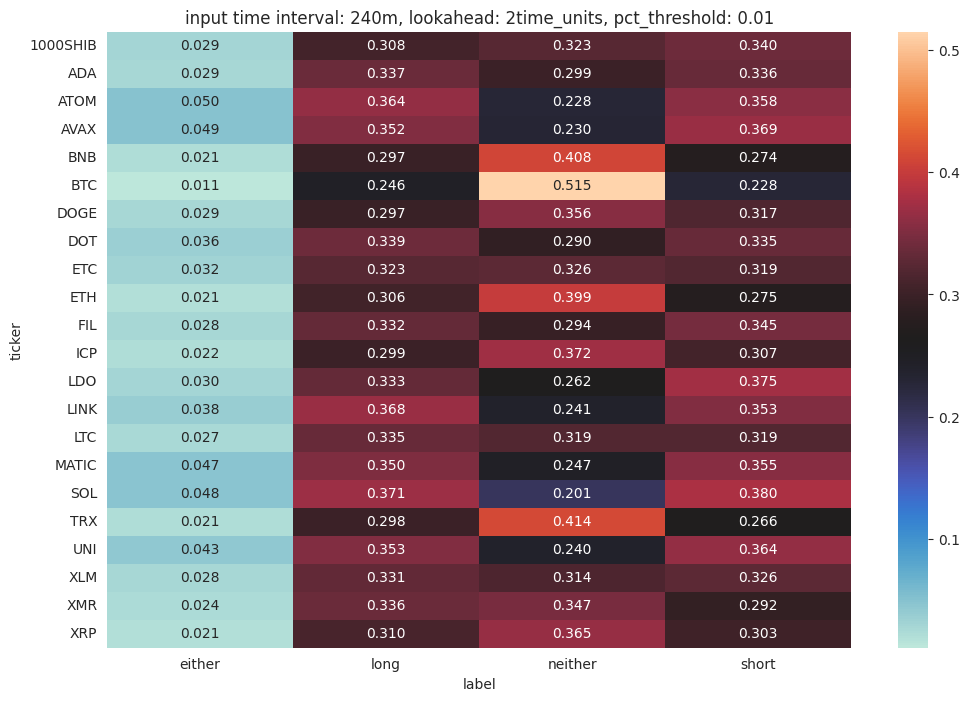

(94252, 10) (23767, 10)


In [ ]:
from configs.config import Config, INPUT_FREQ, PCT_THRESHOLDS, HORIZONS
from train.train import train_model

# fold is fixed to 3
seed = 42
for in_freq in INPUT_FREQ[::-1]:
    for lookahead in HORIZONS:
        for pct_thresh in PCT_THRESHOLDS:

            config = Config()
            config.data_dir = '../data'
            config.models_dir = '../models'
            config.horizon_def = {
                'in_freq' : in_freq,
                'pct_thresh': pct_thresh / 100.,
                'lookahead': lookahead
            }

            config.max_len = 128
            config.fold = 3
            config.model_name = f'hslstm/in_freq{in_freq}m-lookahead{lookahead}-pct_thresh{pct_thresh}-seed{seed}'

            config.sample_run = False
            config.apply_seed(seed = seed)
            results = train_model(config = config)